# Анализ оттока клиентов

В нашем распоряжении датасет, который содержит данные о клиентах банка "Метанпром". Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск. Проанализируем клиентов регионального банка и выделим сегменты клиентов, которые склонны уходить из банка.

**Цель:** 

Выделить сегменты, которые склонны уходить из банка.

**Декомпозиция:**

1 Выгрузка данных.

    1.1 Выгрузим данные и выведем 5 строчек датафрейма.
    
    1.2 Выведем основную информацию о датафрейме с помощью метода info().
    
2 Предобработка данных.

    2.1 Приведем названия колонок к нижнему регистру.
    
    2.2 Проверим на наличие пропусков и дубликатов.
    
    2.3 Обработаем пропущенные значения.
    
    2.4 Коридорование названия городов и пол клиента из строкового формата в численный.
    
    2.5 Обработка аномалий.
    
3 Исследовательский анализ данных.

    3.1 Найдем общий отток по банку.

    3.2 Анализ распределения признаков с категориальными значениями в разрезе оттока.
    
    3.3 Анализ распределения признаков с непрерывными значения в разрезе оттока.
    
    3.4 Корреляционный анализ.
    
    3.5 Анализ портрета клиентов в разрезе оттока.
    
4 Проверка статитических гипотез.

5 Подведение промежуточных итогов по результатам исследователького анализа данных.

6 Объединение признаков отточности в сегменты.

7 Приотиризация сегментов.

8 Рекомендации по работе с сегментами.

## Выгрузка данных

In [1]:
pip install phik

     |████████████████████████████████| 679 kB 2.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
from scipy import stats as st

### Выведем первые 5 строчек датафрейма

In [3]:
data = pd.read_csv('/datasets/bank_scrooge.csv')

In [4]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Выведем основную информацию о датафрейме с помощью метода info()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Датафрейм содержит 12 столбцов и 10000 строк. Имеются пропуски, далее изучим их. Тип данных соответсвует содержанию.

## Предобработка данных

### Приведем названия колонок к нижнему регистру

In [6]:
data.columns = map(str.lower, data.columns)

### Проверим на наличие пропусков и дубликатов

In [7]:
data.isna().sum()

userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [8]:
data.isna().mean()*100

userid            0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64

В столбце 'age'  26 (0.26%) пропущенных значений. 
В столбцу 'balance' 2295 (22.95%) пропущенных значений. Обработаем пропущенные значения в следующем пункте.

In [9]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено. Изучим, есть ли неявные по user_id.

In [10]:
data['userid'].duplicated().sum()

73

Неявных дубликатов 73. Посмотрим на полный набор данных этих строк.

In [11]:
data[data['userid'].duplicated(keep=False)].sort_values('userid')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0


Как видно из таблицы, клиенты с одинаковым userid из разных городов. Это разные клиенты, оставим их в таблице.

### Обработаем пропущенные значения

#### В столбце 'age'  26 (0.26%) пропущенных значений.

Количество очень маленькое, избавимся от них.

In [12]:
data = data.dropna(subset=['age'])

#### В столбце 'balance' 2295 (22.95%) пропущенных значений. 

Эти строки не целесообразно удалять, так как потеряем много информации. Выясним природу этих пропусков. Для этого создадим новый признак 'missing_balance', принимающий 1, если в наблюдении пропущено значение признака, и 0, если в наблюдении значение признака не пропущено.

In [13]:
missing_balance_1 = data['balance'].isna().sum()
data['missing_balance'] = data['balance'].isnull()
data['missing_balance'] = data['missing_balance'].astype(int)
data

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_balance
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0,1
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0,1
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0,0


Посмотрим на корреляция нового признака с остальными признаками датафрейма. Построим корреляцию phik.

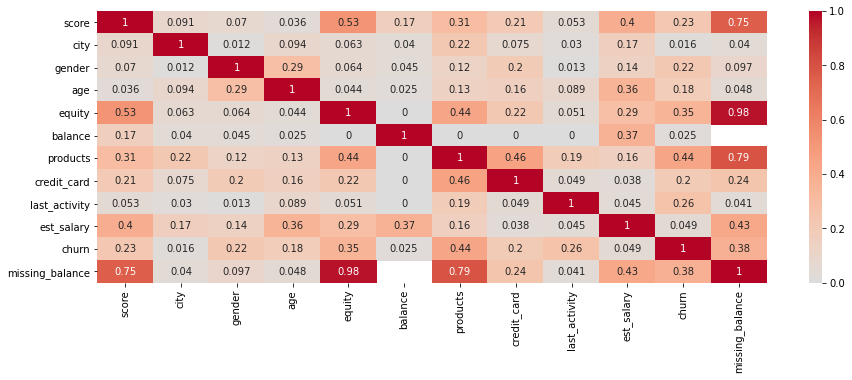

In [14]:
phik_data = data.loc[:, 'score':'missing_balance'].phik_matrix(interval_cols=['age', 'balance', 'est_salary', 'score'])
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(phik_data, cmap='coolwarm', center=0, annot=True)
plt.show()

Как видно из тепловой карты:
- корреляция между пропущенным балансом и оценкой собственности клиента - весьма сильная 0,98;
- корреляция между пропущеным балансом и количеством продуктов - высокая 0,79;
- корреляция между пропущенным балансом и кредитным скорингом - высокая 0,75.

Построим sns.histplot по каждому параметру с параметрами stat='density' и common_norm=False для установления зависимости с пропущенным балансом.

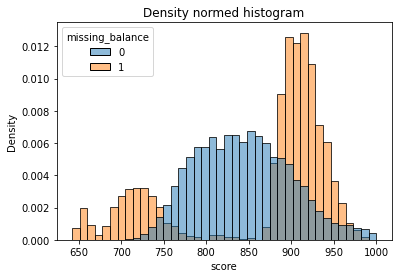

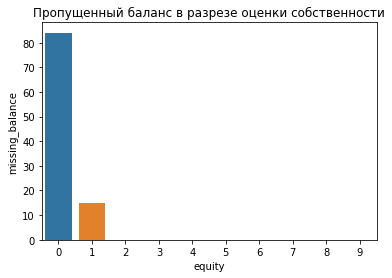

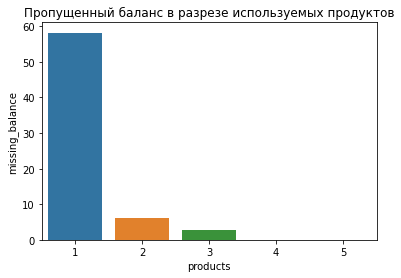

In [15]:
sns.histplot(x = 'score', hue = 'missing_balance', data = data, stat='density', common_norm=False)
plt.title('Density normed histogram')
plt.show()

equity = data.pivot_table(index='equity', values='missing_balance', aggfunc={'sum', 'count'}).reset_index()
equity['missing_balance'] = round(equity['sum']/equity['count']*100, 2)

#display(equity)

sns.barplot(x='equity', y='missing_balance', data=equity)
plt.title('Пропущенный баланс в разрезе оценки собственности')
plt.show()

products = data.query('products > 0').pivot_table(index='products', values='missing_balance', aggfunc={'sum', 'count'}).reset_index()
products['missing_balance'] = round(products['sum']/products['count']*100, 2)

#display(products)

sns.barplot(x='products', y='missing_balance', data=products)
plt.title('Пропущенный баланс в разрезе используемых продуктов')
plt.show()

Из графиков можно сделать вывод, что признаками пропущенного баланса являются:
- оценка собственности клиента 0 и 1баллов;
- количество используемых продуктов - 1, 2, 3;
- кредитний скоринг либо меньше 750 баллов, либо в интервале от 875 до 975.

Таким образом, пропуски в балансе оставим без изменения.

### Коридорование переменных

Категориальные переменные пол  и город клиента закодируем с помощью one-hot кодирования. Создадим дополнительные столбцы.

In [16]:
data['gender_code'] = data['gender']
data['city_code'] = data['city']
data = pd.get_dummies(data, columns=['gender_code', 'city_code'], drop_first= False)
data = data.rename(columns={'gender_code_Ж':'Ж', 
                            'gender_code_М':'М', 
                            'city_code_Ростов':'Ростов', 
                            'city_code_Рыбинск':'Рыбинск',
                            'city_code_Ярославль':'Ярославль'})

data

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_balance,Ж,М,Ростов,Рыбинск,Ярославль
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1,1,0,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,1,0,0,0,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0,0,0,1,0,1,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0,1,0,1,0,0,1
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0,1,0,1,0,0,1
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0,0,1,0,0,0,1


### Исследуем аномалии

#### Посмотрим, если ли клиенты с количеством продуктов - 0

Клиенты банка имеюют как минимум один продукт - карту.

In [17]:
data.query('products == 0')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_balance,Ж,М,Ростов,Рыбинск,Ярославль
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,1,1,0,0,1,0


Удалим из датасета.

In [18]:
data = data.query('products > 0')

#### Исследуем на выбросы 'balance'

In [19]:
print(data['balance'].describe())

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64


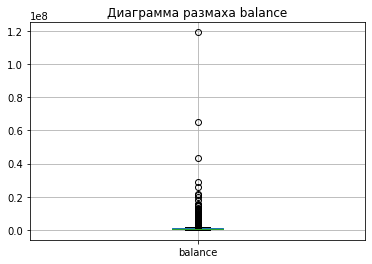

In [20]:
data.boxplot(column='balance')
plt.title('Диаграмма размаха balance')
plt.show()

Среднее и медиана отличаются, в датасете много выбросов по балансу. Скорее всего это состоятельные клиенты. Выделим клиентов, у которых баланс выше Q3, в отдельный датасет vip. 

#### Исследуем на выбросы 'est_salary'

In [21]:
print(data['est_salary'].describe())

count    9.973000e+03
mean     1.477991e+05
std      1.392871e+05
min      2.546300e+03
25%      7.525202e+04
50%      1.196431e+05
75%      1.745000e+05
max      1.395064e+06
Name: est_salary, dtype: float64


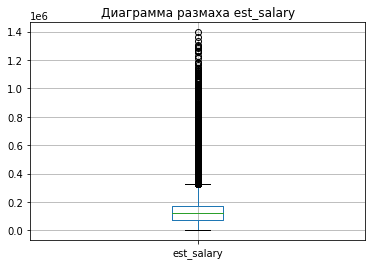

In [22]:
data.boxplot(column='est_salary')
plt.title('Диаграмма размаха est_salary')
plt.show()

Среднее и медиана отличаются, в датасете много выбросов по заработной плате. Определим клиентов, у которых заработная плата выше Q3, также в датасет vip.

In [23]:
Q3_balance = data['balance'].quantile(q=.75)
Q3_est_salary = data['est_salary'].quantile(q=.75)


vip = data[(data['balance'] > Q3_balance) & (data['est_salary'] > Q3_est_salary)]
data_new = data[(data['balance'] <= Q3_balance) | (data['est_salary'] <= Q3_est_salary) | data['balance'].isnull()]

data_new

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_balance,Ж,М,Ростов,Рыбинск,Ярославль
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1,1,0,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,1,0,0,0,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0,0,0,1,0,1,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0,1,0,1,0,0,1
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0,1,0,1,0,0,1
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0,0,1,0,0,0,1


In [24]:
Q3_est_salary

174499.96

In [25]:
vip

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,missing_balance,Ж,М,Ростов,Рыбинск,Ярославль
18,136651,876.0,Ярославль,М,40.0,5,2307947.36,2,0,0,287010.61,0,0,0,1,0,0,1
35,221927,863.0,Ростов,М,39.0,5,1461423.33,1,0,1,221699.52,0,0,0,1,1,0,0
44,210313,935.0,Ярославль,М,41.0,5,3781118.22,2,1,0,761349.20,0,0,0,1,0,0,1
63,140749,948.0,Ярославль,Ж,34.0,5,3134788.66,2,0,0,199705.32,0,0,1,0,0,0,1
74,222208,950.0,Рыбинск,Ж,43.0,4,2332677.14,2,1,1,301845.59,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,117588,852.0,Ярославль,М,39.0,4,2357977.58,2,0,0,213535.23,0,0,0,1,0,0,1
9933,197891,899.0,Ярославль,М,37.0,5,1422472.42,2,0,1,231978.68,1,0,0,1,0,0,1
9941,223285,862.0,Ростов,М,46.0,3,1784723.84,4,1,1,202524.28,1,0,0,1,1,0,0
9963,187204,957.0,Ярославль,М,35.0,4,3431029.03,4,1,0,354987.43,1,0,0,1,0,0,1


In [26]:
print('В результате в датасете осталось', len(data_new), 'строк, и в датасете vip', len(vip))

В результате в датасете осталось 9290 строк, и в датасете vip 683


## Исследовательский анализ данных

### Найдем общий отток по банку

Найдем отток по банку обычный клиентов и vip-клиентов

In [27]:
churn = round(sum(data_new['churn'])/len(data_new['churn'])*100, 2)
churn_vip = round(sum(vip['churn'])/len(vip['churn'])*100, 2)

In [28]:
print('Общий отток по банку обычных клиентов - ', churn, '%, отток по банку vip-клиентов -', churn_vip, '%.')

Общий отток по банку обычных клиентов -  16.11 %, отток по банку vip-клиентов - 47.0 %.


### Анализ распределения признаков с непрерывными значения в разрезе оттока

Определим признаки с непрерывными значения и построим нормализованные гистрограммы. К таким признакам относятся - баллы кредитного скоринга, возраст, баланс, заработная плата, оценка собственности клиента.

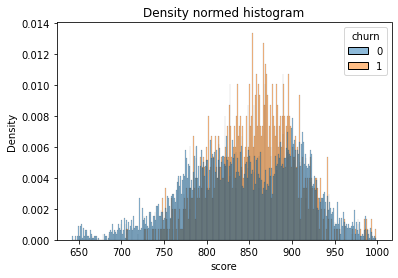

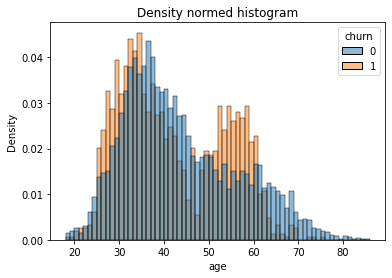

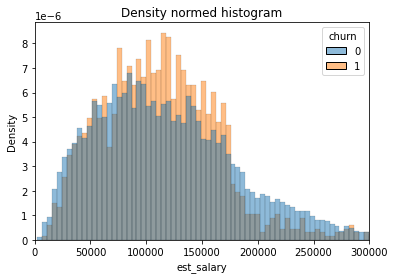

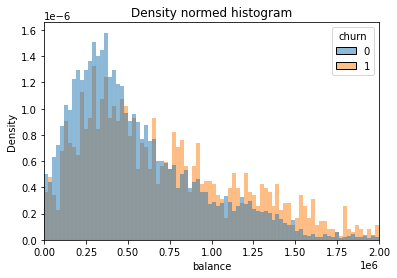

In [29]:
sns.histplot(x = 'score', hue = 'churn', data = data_new, binwidth=1, stat='density', common_norm=False)
plt.title('Density normed histogram')
plt.show()

sns.histplot(x = 'age', hue = 'churn', data = data_new, binwidth=1, stat='density', common_norm=False)
plt.title('Density normed histogram')
plt.show()

sns.histplot(x = 'est_salary', hue = 'churn', data = data_new, bins=300, stat='density', common_norm=False)
plt.xlim([0, 300000])
plt.title('Density normed histogram')
plt.show()


sns.histplot(x = 'balance', hue = 'churn', data = data_new, bins=5000, stat='density', common_norm=False)
plt.xlim([0, 2000000])
plt.title('Density normed histogram')
plt.show()

 Из графиков можно сделать выводы:
 - 'score' отточный интервал по кредитному скорингу от 825 до 900 баллов;
 - 'age' отточные инервали по возрасту: от 25 до 35 и от 50 до 60;
 - 'est_salary' отточные интервалы по зарплате от 75 тыс до 155 тыс;
 - 'balance' отточные интервалы по балансу от 750 тыс до 2 млн.

### Анализ распределения признаков с непрерывными значения в разрезе оттока vip-клиентов

Определим признаки с непрерывными значения и построим нормализованные гистрограммы для vip-клиетов.

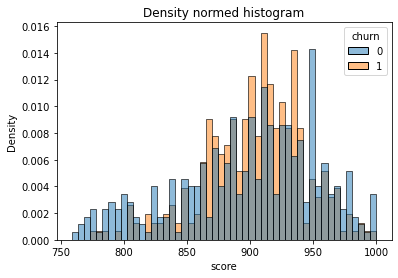

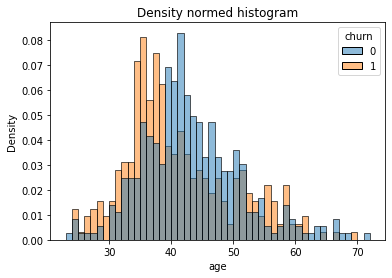

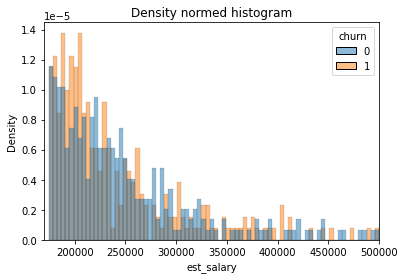

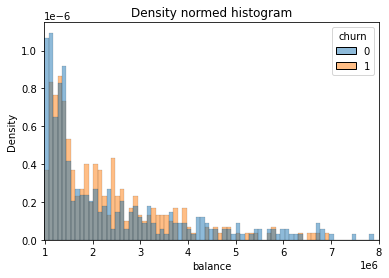

In [30]:
sns.histplot(x = 'score', hue = 'churn', data = vip, bins = 50, stat='density', common_norm=False)
plt.title('Density normed histogram')
plt.show()

sns.histplot(x = 'age', hue = 'churn', data = vip, binwidth=1, stat='density', common_norm=False)
plt.title('Density normed histogram')
plt.show()

sns.histplot(x = 'est_salary', hue = 'churn', data = vip, bins=300, stat='density', common_norm=False)
plt.xlim([170000, 500000])
plt.title('Density normed histogram')
plt.show()


sns.histplot(x = 'balance', hue = 'churn', data = vip, bins=300, stat='density', common_norm=False)
plt.xlim([980000, 8000000])
plt.title('Density normed histogram')
plt.show()

Vip-клиенты имеют похожие интервалы отточности:
- 'score' отточный интервал по кредитному скорингу от 860 до 940 баллов;
- 'age' отточные интервали по возрасту: от 25 до 37 и от 55 до 60;
- 'est_salary' невозможно выделить интервалы;
- 'balance' невозможно выделить интервалы.

### Анализ распределения признаков с категориальными значениями в разрезе оттока

#### Анализ распределения городов в разрезе оттока

In [31]:
city = data_new.pivot_table(index='city', values='churn', aggfunc={'sum', 'count'}).reset_index()
city['churn'] = round(city['sum']/city['count']*100, 2)

city

,city,count,sum,churn
0,Ростов,1350,231,17.11
1,Рыбинск,2544,380,14.94
2,Ярославль,5396,886,16.42


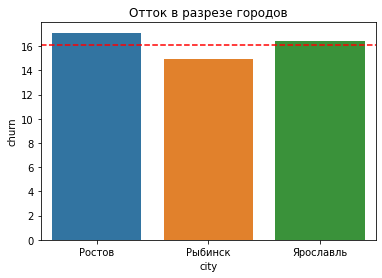

In [32]:
sns.barplot(x='city', y='churn', data=city)
plt.axhline(y=churn, color='red', linestyle='--')
plt.title('Отток в разрезе городов')
plt.show()

**Вывод:** Из графика видно, что город не влияет на уровень оттока. По всем городам уровень оттока меньше общего по банку.

#### Анализ распределения городов в разрезе оттока vip-клиентов

,city,count,sum,churn
0,Ростов,66,34,51.52
1,Рыбинск,138,56,40.58
2,Ярославль,479,231,48.23


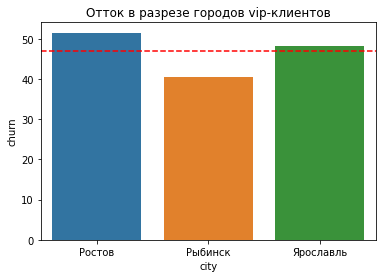

In [33]:
city = vip.pivot_table(index='city', values='churn', aggfunc={'sum', 'count'}).reset_index()
city['churn'] = round(city['sum']/city['count']*100, 2)

display(city)

sns.barplot(x='city', y='churn', data=city)
plt.axhline(y=churn_vip, color='red', linestyle='--')
plt.title('Отток в разрезе городов vip-клиентов')
plt.show()

**Вывод:** Vip-клиенты более отточны в Ростове, по сравнению с другими городами.

#### Анализ распределения мужчин и женщин в разрезе оттока

In [34]:
gender = data_new.pivot_table(index='gender', values='churn', aggfunc={'sum', 'count'}).reset_index()
gender['churn'] = round(gender['sum']/gender['count']*100, 2)
gender

,gender,count,sum,churn
0,Ж,4720,542,11.48
1,М,4570,955,20.90


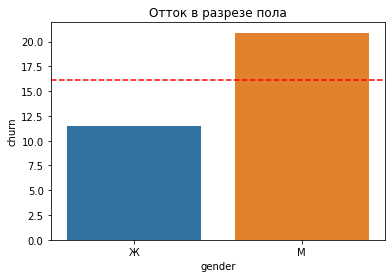

In [35]:
sns.barplot(x='gender', y='churn', data=gender)
plt.axhline(y=churn, color='red', linestyle='--')
plt.title('Отток в разрезе пола')
plt.show()

**Вывод:** У мужчин уровень оттока 22%, у женщин - 12%. Можно сделать вывод, что мужчины более отточны.

#### Анализ распределения мужчин и женщин в разрезе оттока vip-клиентов

,gender,count,sum,churn
0,Ж,262,93,35.50
1,М,421,228,54.16


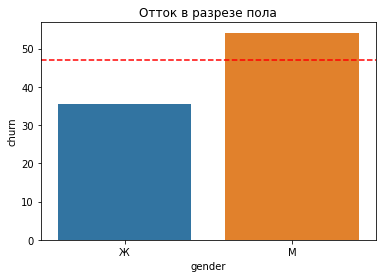

In [36]:
gender = vip.pivot_table(index='gender', values='churn', aggfunc={'sum', 'count'}).reset_index()
gender['churn'] = round(gender['sum']/gender['count']*100, 2)
display(gender)

sns.barplot(x='gender', y='churn', data=gender)
plt.axhline(y=churn_vip, color='red', linestyle='--')
plt.title('Отток в разрезе пола')
plt.show()

**Вывод:** Мужчины vip-клиенты также более отточны.

#### Анализ распределения наличия кредитной карты в разрезе оттока

In [37]:
credit_card = data_new.pivot_table(index='credit_card', values='churn', aggfunc={'sum', 'count'}).reset_index()
credit_card['churn'] = round(credit_card['sum']/credit_card['count']*100, 2)

credit_card

,credit_card,count,sum,churn
0,0,2849,642,22.53
1,1,6441,855,13.27


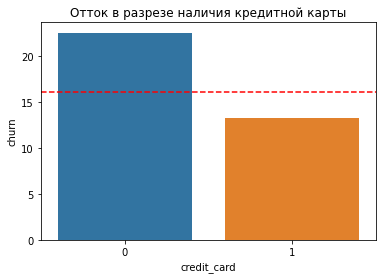

In [38]:
sns.barplot(x='credit_card', y='churn', data=credit_card)
plt.axhline(y=churn, color='red', linestyle='--')
plt.title('Отток в разрезе наличия кредитной карты')
plt.show()

**Вывод:** Из графика видно, что более отточны клиенты, у которых нет кредитной карты - отток 23%. У клиентов, которые имеют кредитную карту, уровень оттока меньше общего по банку.

#### Анализ распределения наличия кредитной карты в разрезе оттока vip-клиентов

,credit_card,count,sum,churn
0,0,340,173,50.88
1,1,343,148,43.15


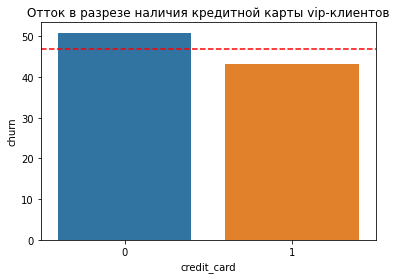

In [39]:
credit_card = vip.pivot_table(index='credit_card', values='churn', aggfunc={'sum', 'count'}).reset_index()
credit_card['churn'] = round(credit_card['sum']/credit_card['count']*100, 2)

display(credit_card)

sns.barplot(x='credit_card', y='churn', data=credit_card)
plt.axhline(y=churn_vip, color='red', linestyle='--')
plt.title('Отток в разрезе наличия кредитной карты vip-клиентов')
plt.show()

**Вывод:** Более отточны клиенты, у которых нет кредитной карты.

#### Анализ распределения последней активности в разрезе оттока

In [40]:
last_activity = data_new.pivot_table(index='last_activity', values='churn', aggfunc={'sum', 'count'}).reset_index()
last_activity['churn'] = round(last_activity['sum']/last_activity['count']*100, 2)


last_activity

,last_activity,count,sum,churn
0,0,4425,452,10.21
1,1,4865,1045,21.48


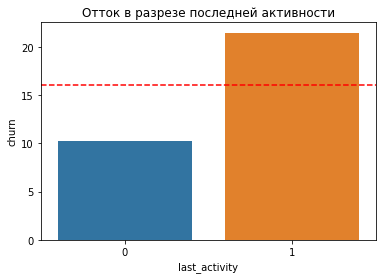

In [41]:
sns.barplot(x='last_activity', y='churn', data=last_activity)
plt.axhline(y=churn, color='red', linestyle='--')
plt.title('Отток в разрезе последней активности')
plt.show()

**Вывод:** Из графика видно, что более отточны клиенты, у которых была активность. Уровень их оттока - 23%. Значит гипотеза о том, что неактивные клиенты менее отточны, не подтвердилась.

#### Анализ распределения последней активности в разрезе оттока vip-клиентов

,last_activity,count,sum,churn
0,0,333,89,26.73
1,1,350,232,66.29


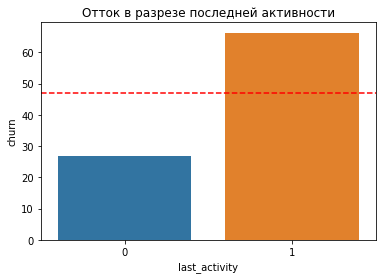

In [42]:
last_activity = vip.pivot_table(index='last_activity', values='churn', aggfunc={'sum', 'count'}).reset_index()
last_activity['churn'] = round(last_activity['sum']/last_activity['count']*100, 2)

display(last_activity)

sns.barplot(x='last_activity', y='churn', data=last_activity)
plt.axhline(y=churn_vip, color='red', linestyle='--')
plt.title('Отток в разрезе последней активности')
plt.show()

**Выод:** Более отточны клиенты, у которых была активность.

#### Анализ распределения пропущенного баланса в разрезе оттока

In [43]:
missing_balance = data_new.pivot_table(index='missing_balance', values='churn', aggfunc={'sum', 'count'}).reset_index()
missing_balance['churn'] = round(missing_balance['sum']/missing_balance['count']*100, 2)

missing_balance

,missing_balance,count,sum,churn
0,0,7012,1485,21.18
1,1,2278,12,0.53


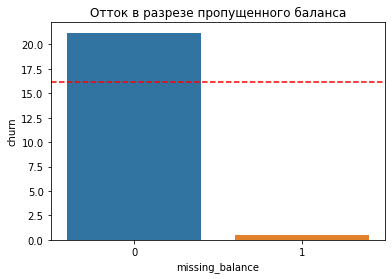

In [44]:
sns.barplot(x='missing_balance', y='churn', data=missing_balance)
plt.axhline(y=churn, color='red', linestyle='--')
plt.title('Отток в разрезе пропущенного баланса')
plt.show()

**Вывод:** Можно сделать вывод, что пропущенный баланс является признака не оттока. Отток выше общего по банку, 21% у тех, у кого баланс не пропущен.

#### Анализ распределения пропущенного баланса в разрезе оттока vip-клиентов

,missing_balance,count,sum,churn
0,0,683,321,47.0


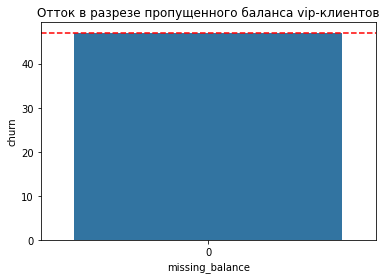

In [45]:
missing_balance = vip.pivot_table(index='missing_balance', values='churn', aggfunc={'sum', 'count'}).reset_index()
missing_balance['churn'] = round(missing_balance['sum']/missing_balance['count']*100, 2)

display(missing_balance)

sns.barplot(x='missing_balance', y='churn', data=missing_balance)
plt.axhline(y=churn_vip, color='red', linestyle='--')
plt.title('Отток в разрезе пропущенного баланса vip-клиентов')
plt.show()

**Вывод:** Vip-клиенты не имеют пропусков в балансе.

#### Анализ распределения оценки собственности клиентов в разрезе оттока клиентов.

,equity,count,sum,churn
0,0,2576,90,3.49
1,1,770,93,12.08
2,2,1018,154,15.13
3,3,1430,271,18.95
4,4,1644,372,22.63
5,5,1610,431,26.77
6,6,142,45,31.69
7,7,74,31,41.89
8,8,15,5,33.33
9,9,11,5,45.45


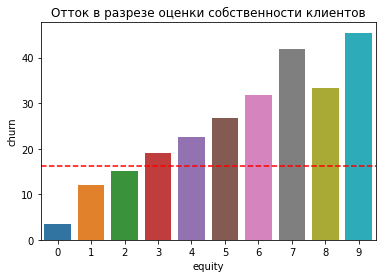

In [46]:
equity = data_new.pivot_table(index='equity', values='churn', aggfunc={'sum', 'count'}).reset_index()
equity['churn'] = round(equity['sum']/equity['count']*100, 2)

display(equity)

sns.barplot(x='equity', y='churn', data=equity)
plt.axhline(y=churn, color='red', linestyle='--')
plt.title('Отток в разрезе оценки собственности клиентов')
plt.show()

**Вывод:** Самые отточные клиенты, которые имеют оценку собственности 3 и выше.

#### Анализ распределения оценки собственности клиентов в разрезе оттока vip-клиентов.

,equity,count,sum,churn
0,1,3,0,0.00
1,2,33,12,36.36
2,3,110,50,45.45
3,4,203,92,45.32
4,5,305,145,47.54
5,6,19,13,68.42
6,7,6,6,100.00
7,8,2,1,50.00
8,9,2,2,100.00


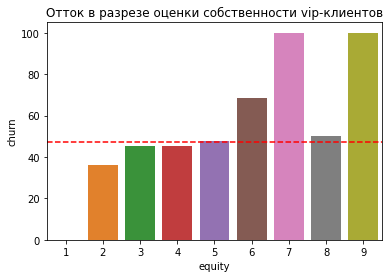

In [47]:
equity = vip.pivot_table(index='equity', values='churn', aggfunc={'sum', 'count'}).reset_index()
equity['churn'] = round(equity['sum']/equity['count']*100, 2)

display(equity)

sns.barplot(x='equity', y='churn', data=equity)
plt.axhline(y=churn_vip, color='red', linestyle='--')
plt.title('Отток в разрезе оценки собственности vip-клиентов')
plt.show()

**Вывод:** Наиболее отточные vip-кллиенты, которые имеют оценку собственности - 6, 7 и 9.

#### Анализ распределения количества используемых продуктов в разрезе оттока клиентов.

,products,count,sum,churn
0,1,3241,217,6.70
1,2,4732,820,17.33
2,3,935,249,26.63
3,4,364,204,56.04
4,5,18,7,38.89


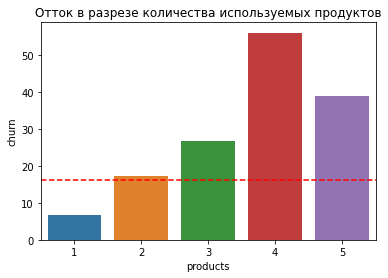

In [48]:
products = data_new.pivot_table(index='products', values='churn', aggfunc={'sum', 'count'}).reset_index()
products['churn'] = round(products['sum']/products['count']*100, 2)

display(products)

sns.barplot(x='products', y='churn', data=products)
plt.axhline(y=churn, color='red', linestyle='--')
plt.title('Отток в разрезе количества используемых продуктов')
plt.show()

**Вывод:** Наиболее отточные клиенты, которые используют 3, 4 и 5 продуктов.

#### Анализ распределения количества используемых продуктов в разрезе оттока vip-клиентов.

,products,count,sum,churn
0,1,82,18,21.95
1,2,387,158,40.83
2,3,103,48,46.60
3,4,110,96,87.27
4,5,1,1,100.00


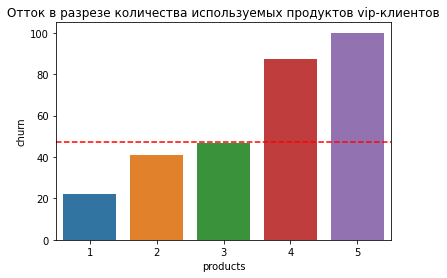

In [49]:
products = vip.pivot_table(index='products', values='churn', aggfunc={'sum', 'count'}).reset_index()
products['churn'] = round(products['sum']/products['count']*100, 2)

display(products)

sns.barplot(x='products', y='churn', data=products)
plt.axhline(y=churn_vip, color='red', linestyle='--')
plt.title('Отток в разрезе количества используемых продуктов vip-клиентов')
plt.show()

**Вывод:** Наиболее отточные vip-клиенты, которые используют 4 и 5 продуктов банка.

### Корреляционный анализ

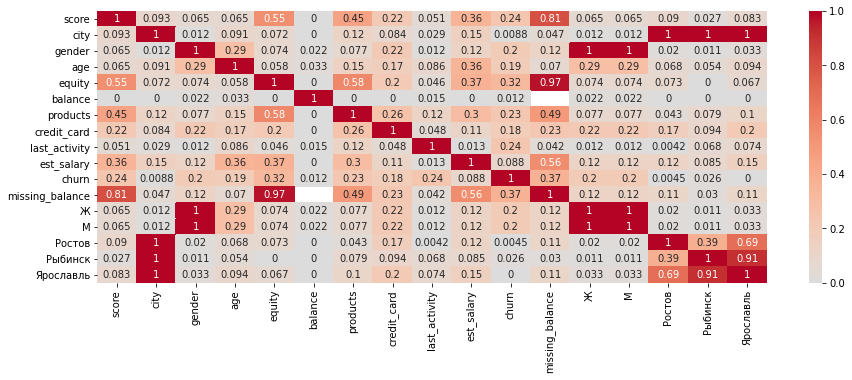

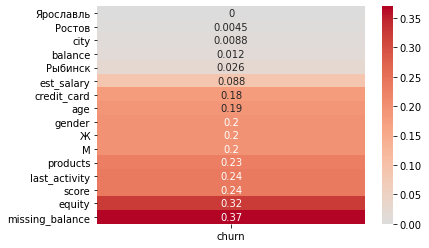

In [50]:
phik_data = data_new.loc[:, 'score':'Ярославль'].phik_matrix(interval_cols=['age', 'balance', 'est_salary', 'score'])
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(phik_data, cmap='coolwarm', center=0, annot=True)
plt.show()
sns.heatmap(phik_data.loc[:,['churn']].drop('churn').sort_values('churn'), cmap='coolwarm', center=0, annot=True)
plt.show()

Изучим корреляцию оттока с другими признаками:
- умеренная корреляция - пропущенный баланс 0,37, оценка собственности клиента 0,32;
- слабая - кредитный скоринг 0,24, последняя активность 0,24, количество продуктов 0,23, пол клиента 0,2, возраст 0,19, наличие кредитной карты 0,18;
- остальные приназнаки показали корреляцию меньше 0,1 - заработная плата, город, баланс.

### Корреляционный анализ vip-клиентов

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable missing_balance for analysis 1. Dropping this column
  warnings.warn(


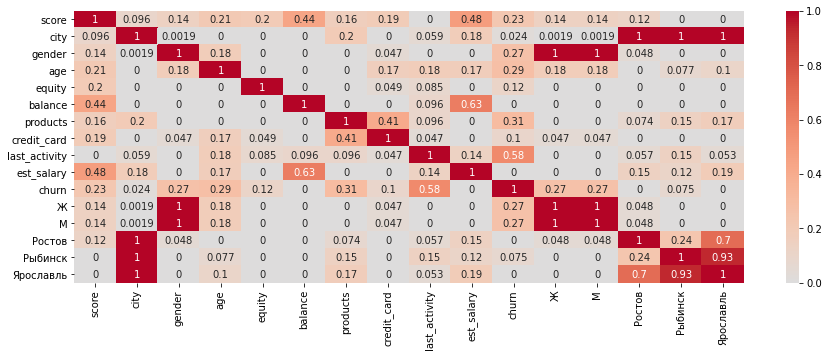

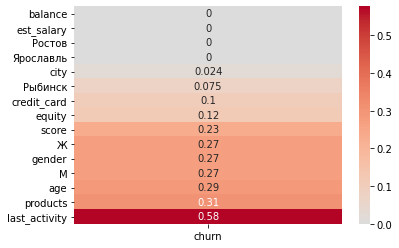

In [51]:
phik_data = vip.loc[:, 'score':'Ярославль'].phik_matrix(interval_cols=['age', 'balance', 'est_salary', 'score'])
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(phik_data, cmap='coolwarm', center=0, annot=True)
plt.show()
sns.heatmap(phik_data.loc[:,['churn']].drop('churn').sort_values('churn'), cmap='coolwarm', center=0, annot=True)
plt.show()

Изучим корреляцию оттока с другими признаками vip-клиентов:
- заметная корреляция - активность клиента 0,58;
- умеренная корреляция -  количество используемых продуктов 0,31;
- слабая корреляция - возраст 0,29, пол 0,27, кредитный скоринг 0,23, оценка собственности клиенты - 0,12, наличие кредитной карты 0,1.


### Анализ портрета клиентов в разрезе оттока

Построим сводную таблицу по мерам центральной тенденции, описывабщие портреты клиентов. По каждому признаку между сегментами посчитаем относительную разницу.

In [52]:
churn_pivot = (
    data_new
    .groupby('churn')
    .agg({'est_salary':'mean', 
          'age':'mean',
          'score':'mean',
          'balance':'mean',
          'products':'median', 
          'equity':'median',
          'credit_card':[pd.Series.mode],
          'last_activity':[pd.Series.mode],
          'city':[pd.Series.mode], 
          'gender':[pd.Series.mode]})
)


churn_pivot.columns = ['Средняя з/п', 'Средний возраст','Средний скоринг','Средний баланс', 'Медианное количество продуктов', 'Медианное количество собственности', 'Мода по кредитной карте', 'Мода по активности', 'Мода по городу', 'Мода по полу']
churn_pivot = churn_pivot.T.reset_index()
churn_pivot.columns = ['Признак', 'Не отток', 'Отток']
churn_pivot[len(churn_pivot.columns)] = (churn_pivot.loc[0:5,'Отток'] - churn_pivot.loc[0:5,'Не отток'])/(churn_pivot.loc[0:5,'Не отток']*100)
churn_pivot = churn_pivot.rename(columns={3:'Относительная разница в %'})

churn_pivot

,Признак,Не отток,Отток,Относительная разница в %
0,Средняя з/п,139460.062487,116972.293587,-0.001612
1,Средний возраст,43.036186,41.603874,-0.000333
2,Средний скоринг,842.943796,854.730795,0.00014
3,Средний баланс,600210.514898,815434.904512,0.003586
4,Медианное количество продуктов,2,2,0.0
5,Медианное количество собственности,2,4,0.01
6,Мода по кредитной карте,1,1,NaN
7,Мода по активности,0,1,NaN
8,Мода по городу,Ярославль,Ярославль,NaN
9,Мода по полу,Ж,М,NaN


**Вывод:** Как видно из таблицы, разницы по мерам центральной тендеции между клиентами оттока и не оттока, существенной нет.

### Анализ портрета vip - клиентов в разрезе оттока

In [53]:
churn_pivot = (
    vip
    .groupby('churn')
    .agg({'est_salary':'mean', 
          'age':'mean',
          'score':'mean',
          'balance':'mean',
          'products':'median', 
          'equity':'median',
          'credit_card':[pd.Series.mode],
          'last_activity':[pd.Series.mode],
          'city':[pd.Series.mode], 
          'gender':[pd.Series.mode]})
)


churn_pivot.columns = ['Средняя з/п', 'Средний возраст','Средний скоринг','Средний баланс', 'Медианное количество продуктов', 'Медианное количество собственности', 'Мода по кредитной карте', 'Мода по активности', 'Мода по городу', 'Мода по полу']
churn_pivot = churn_pivot.T.reset_index()
churn_pivot.columns = ['Признак', 'Не отток', 'Отток']
churn_pivot[len(churn_pivot.columns)] = (churn_pivot.loc[0:5,'Отток'] - churn_pivot.loc[0:5,'Не отток'])/(churn_pivot.loc[0:5,'Не отток']*100)
churn_pivot = churn_pivot.rename(columns={3:'Относительная разница в %'})

churn_pivot

,Признак,Не отток,Отток,Относительная разница в %
0,Средняя з/п,324514.930829,294723.927975,-0.000918
1,Средний возраст,42.690608,40.616822,-0.000486
2,Средний скоринг,898.190608,903.613707,0.00006
3,Средний баланс,2760938.547265,2610313.684673,-0.000546
4,Медианное количество продуктов,2,2,0.0
5,Медианное количество собственности,4,5,0.0025
6,Мода по кредитной карте,1,0,NaN
7,Мода по активности,0,1,NaN
8,Мода по городу,Ярославль,Ярославль,NaN
9,Мода по полу,М,М,NaN


**Вывод:** Как видно из таблицы, разницы по мерам центральной тендеции между vip-клиентами оттока и не оттока также нет.

## Проверка статитических гипотез

### Проверка гипотезы №1

Нулевая гипотеза (H0): Средние доходы между теми клиентами, которые ушли и теми, которые остались равны.

Альтернативная гипотеза (H1): Средние доходы между теми клиентами, которые ушли и теми, которые остались не равны.

Проверим 3 условия для применения t-теста:

    1) Генеральные совокупности не зависят друг от друга. - Да, это разные клиенты.
    2) Выборочные средние нормально распределены. - Сделаем проверку.
    3) Дисперсии рассматриваемых генеральных совокупностей равны. - Выборки разного размера, укажем параметр equal_var=False.
    
Проверка на нормальность с помощью критерия Шапиро-Уилка:

In [54]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(data_new[data_new['churn']==0]['est_salary'])
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [55]:
from scipy import stats as st
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(data_new[data_new['churn']==1]['est_salary'])
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  4.203895392974451e-43
Отвергаем нулевую гипотезу: распределение не нормально


Выборки распределены ненормально. Для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

In [56]:
results = st.mannwhitneyu(data_new[data_new['churn']==0]['est_salary'],
                      data_new[data_new['churn']==1]['est_salary'])

alpha = 0.05 # уровень статистической значимости

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.0009622956952685256
Отвергаем нулевую гипотезу: разница статистически значима


Проведенный непараметрический тест Уилкоксона-Манна-Уитни показал, что нулевую гипотезу о том, что средние доходы отточных и не отточных равны, отвергаем. Средние доходы отточных и неотточных клиентов различаются.

### Проверка гипотезы №2

Нулевая гипотеза (H0): Средние оценки собственности между теми клиентами, которые ушли и теми, которые остались равны.

Альтернативная гипотеза (H1): Средние оценки собственности между теми клиентами, которые ушли и теми, которые остались не равны.

Проверим выборки на нормальность распределения с помощью критерия Шапиро-Уилка:

In [57]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(data_new[data_new['churn']==0]['equity'])
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [58]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(data_new[data_new['churn']==1]['equity'])
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  4.584990544380739e-26
Отвергаем нулевую гипотезу: распределение не нормально


Выборки распределены ненормально. Для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

In [59]:
results = st.mannwhitneyu(data_new[data_new['churn']==0]['equity'],
                      data_new[data_new['churn']==1]['equity'])

alpha = 0.05 # уровень статистической значимости

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  2.6665263622127003e-124
Отвергаем нулевую гипотезу: разница статистически значима


Проведенный непараметрический тест Уилкоксона-Манна-Уитни показал, что нулевую гипотезу о том, что средние оценки собственности между теми клиентами, которые ушли и теми, которые остались равны, следует отвергнуть. Ранее в анализе мы это уже увидели на графике.

## Подведение промежуточных итогов по результатам исследователького анализа данных

Проведенное исследование показало, что между оттоком и определенными признаками есть умеренная кореляция. Опишем признаки, влияющие на отток клиентов из банка:
- 'score' отточный интервал по кредитному скорингу от 825 до 900 баллов;
- 'age' отточные инервали по возрасту: от 25 до 35 и от 50 до 60;
- 'est_salary' отточные интервалы по зарплате от 75 тыс до 155 тыс;
- 'balance' отточные интервалы по балансу от 750 тыс до 2 млн;
- 'equity' самые отточные клиенты, которые имеют оценку собственности 3 и выше;
- 'products' наиболее отточные клиенты, которые используют 3, 4 и 5 продуктов;
- 'gender' мужчины более отточны, чем женщины;
- 'credit_card' более отточны клиенты, у которых нет кредитной карты;
- 'last_activity' более отточны клиенты, у которых была активность;
- 'missing_balance' более отточны клиенты, у которых баланс не пропущен.

Корреляцию с оттоком показали следующие признаки:
- умеренная корреляция - пропущенный баланс 0,37, оценка собственности клиента 0,32;
- слабая - кредитный скоринг 0,24, последняя активность 0,24, количество продуктов 0,23, пол клиента 0,2, возраст 0,19, наличие кредитной карты 0,18;
- остальные приназнаки показали корреляцию меньше 0,1 - заработная плата, город, баланс.


Для vip-клиентоы был проведен отдельный анализ. Опишем признаки, влияющие на отток vip-клиентов из банка:
- 'score' отточный интервал по кредитному скорингу от 860 до 940 баллов;
- 'age' отточные инервали по возрасту: от 25 до 37 и от 55 до 60;
- 'equity' наиболее отточные vip-кллиенты, которые имеют оценку собственности - 6, 7 и 9;
- 'products' наиболее отточные vip-клиенты, которые используют 4 и 5 продуктов банка;
- 'gender' мужчины более отточны, чем женщины;
- 'credit_card' более отточны клиенты, у которых нет кредитной карты;
- 'last_activity' более отточны клиенты, у которых была активность.

Корреляцию с оттоком vip-клиентов показали следующие признаки:
- заметная корреляция - активность клиента 0,58;
- умеренная корреляция -  количество используемых продуктов 0,31;
- слабая корреляция - возраст 0,29, пол 0,27, кредитный скоринг 0,23, оценка собственности клиенты - 0,12, наличие кредитной карты 0,1.


## Объединение признаков отточности в сегменты

По результатам EDA, корреляции и гипотез, проведем сегментацию клиентов. В качестве признаков, которые лягут в основу сегментов, определим:
- активность клиента
- баланс
- возраст
- пол
- оценка собственности
- наличие кредитной карты
- кредитный скоринг

### Сегмент №1

* кредитный скоринг от 825 до 900
* активные клиенты

In [60]:
segment_1 = data_new[(data_new['last_activity'] == 1) & (data_new['score'] > 825) & (data_new['score'] < 900)]['userid'].count()
print('Количество клиентов в сегменте:', segment_1)

segment_1_churn = data_new[(data_new['last_activity'] == 1) & (data_new['score'] > 825) & (data_new['score'] < 900) & (data_new['churn'] == 1)]['userid'].count()
print('Количество отточных клиентов в сегменте:', segment_1_churn)

print('Процент отточных клиентов', round(segment_1_churn/segment_1*100, 2))

Количество клиентов в сегменте: 1801
Количество отточных клиентов в сегменте: 644
Процент отточных клиентов 35.76


### Сегмент №2

- возраст от 25 до 35
- баланс более 750 тыс.

In [61]:
segment_2 = data_new[(data_new['age'] > 25) & (data_new['age'] < 35) & (data_new['balance'] > 750000)]['userid'].count()
print('Количество клиентов в сегменте:', segment_2)

segment_2_churn = data_new[(data_new['age'] > 25) & (data_new['age'] < 35) & (data_new['balance'] > 750000)& (data_new['churn'] == 1)]['userid'].count()
print('Количество отточных клиентов в сегменте:', segment_2_churn)

print('Процент отточных клиентов', round(segment_2_churn/segment_2*100, 2))

Количество клиентов в сегменте: 381
Количество отточных клиентов в сегменте: 175
Процент отточных клиентов 45.93


### Сегмент №3

- мужчины
- возраст от 50 до 60 лет

In [62]:
segment_3 = data_new[(data_new['gender'] == 'М') & (data_new['age'] > 50) & (data_new['age'] < 60)]['userid'].count()
print('Количество клиентов в сегменте:', segment_3)

segment_3_churn = data_new[(data_new['gender'] == 'М') & (data_new['age'] > 50) & (data_new['age'] < 60) & (data_new['churn'] == 1)]['userid'].count()
print('Количество отточных клиентов в сегменте:', segment_3_churn)

print('Процент отточных клиентов', round(segment_3_churn/segment_3*100, 2))

Количество клиентов в сегменте: 572
Количество отточных клиентов в сегменте: 186
Процент отточных клиентов 32.52


### Сегмент №4

- оценка собственности клиента выше 2 баллов
- активный клиент
- нет кредитной карты

In [63]:
segment_4 = data_new[(data_new['equity'] > 2) & (data_new['last_activity'] == 1) & (data_new['credit_card'] == 0)]['userid'].count()
print('Количество клиентов в сегменте:', segment_4)

segment_4_churn = data_new[(data_new['equity'] > 2) & (data_new['last_activity'] == 1) & (data_new['credit_card'] == 0) & (data_new['churn'] == 1)]['userid'].count()
print('Количество отточных клиентов в сегменте:', segment_4_churn)

print('Процент отточных клиентов', round(segment_4_churn/segment_4*100, 2))

Количество клиентов в сегменте: 1024
Количество отточных клиентов в сегменте: 421
Процент отточных клиентов 41.11


### Сегмент №5 vip-клиенты
- активные клиенты
- 'score' отточный интервал по кредитному скорингу от 860 до 940 баллов;

In [64]:
segment_5 =  vip[(vip['score'] > 860) & (vip['score'] < 940) & (vip['last_activity'] == 1)]['userid'].count()
print('Количество клиентов в сегменте:', segment_5)

segment_5_churn = vip[(vip['score'] > 860) & (vip['score'] < 940) & (vip['last_activity'] == 1) & (vip['churn'] == 1)]['userid'].count()
print('Количество отточных клиентов в сегменте:', segment_5_churn)

print('Процент отточных клиентов', round(segment_5_churn/segment_5*100, 2))

Количество клиентов в сегменте: 203
Количество отточных клиентов в сегменте: 165
Процент отточных клиентов 81.28


## Приотиризация сегментов

Расположим сегменты в порядке приоритета по убыванию количества отточных клиентов в сегменте.

1. В сегменте № 1 процент отточных - 35, количество отточных - 644. 
2. В сегменте № 4 процент отточных - 41, количество отточных - 421. 
3. В сегменте № 3 процент отточных - 32, количество отточных - 186.
4. В сегменте № 2 процент отточных - 45, количество отточных - 175.
5. В сегменте № 5 vip-клиенты процент отточных - 81, количество отточных - 165.

## Выводы и рекомендации по работе с сегментами

Исследование было проведено для маркетингового отдела на основе датасета клиентов 'Метанпромбанка'. Цель исследования - выделить сегменты, которые склонны уходить из банка.

1. Перед анализом была проделана предварительная обработка данных.

Датасет содежит 12 столбцов и 10000 строк. В столбце возраст было 0.26% пропущенных значений, баланс 22.95% пропущенных значений. 
В результате предобработки, в датасете осталось 9973 записей. Из этого датасета были выделены vip-клиенты, которые имеют высокие зарплату и баланс. Датасет с vip-клиентами содежит 683 запись, оставшиеся клиенты образут датасет с 9290 записями.

2. EDA - анализ.

В результате исследования была выялена зависимость между оттоком и некоторами параметрами.

К параметрам, влияющим на отток относятся:
- кредитный скоринг: отточный интервал по кредитному скорингу от 825 до 900 баллов;
- возраст: отточные инервали по возрасту: от 25 до 35 и от 50 до 60;
- баланс: отточные интервалы по балансу от 750 тыс;
- оценка собствености клиента: самые отточные клиенты, которые имеют оценку собственности 3 и выше;
- количество продуктов: наиболее отточные клиенты, которые используют 3, 4 и 5 продуктов;
- пол: мужчины более отточны, чем женщины;
- кредитная карта: более отточны клиенты, у которых нет кредитной карты;
- активность: более отточны клиенты, у которых была активность.

3. Рекомендации для отдела маркетинга.

Сегмент №1

- кредитный скоринг от 825 до 900
- активные клиенты

Процент отточных - 35, количество отточных - 644.

Рекомендации:
- информировать о новых доступных банковских продуктах;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк.

Сегмент №4

- оценка собственности клиента выше 2 баллов
- активный клиент
- нет кредитной карты

Процент отточных - 41, количество отточных - 421.

Рекомендации:
- предложить оформить кредитную карту;
- предложить специальные условия по страхованию объектов собственности.

Сегмент №3

- мужчины
- возраст от 50 до 60 лет

Процент отточных - 32, количество отточных - 186.

Рекомендации:
- для клиентов пенсионного возраста - предложить льготные условия для перевода пенсии в наш банк;
- предложить специальные условия по страхованию объектов собственности.

Сегмент №2

- возраст от 25 до 35
- баланс более 750 тыс.

Процент отточных - 45, количество отточных - 175.

Рекомендации:
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк;
- информировать о новых доступных банковских продуктах;
- предложить повышенный кэшбэк на одежду, товары для дома.

Сегмент №5 vip-клиенты
- активные клиенты
- отточный интервал по кредитному скорингу от 860 до 940 баллов

Процент отточных - 81, количество отточных - 165.

Рекомендации:
- предложить специальные условия по страхованию объектов собственности;
- предложить специальные усовия по вкладам.